In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
dataset_path = 'INF2178_A4_data.csv'
data = pd.read_csv(dataset_path)

In [3]:
print(data.head())

# Get a concise summary of the DataFrame
print(data.info())

# Get the shape of the dataset
print(data.shape)

   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
2    R   75    12  NaN  23.0  0.5  1678  0.736  1.046  
3    R   76    12  NaN  28.0  0.5  1738  0.713  1.010  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 

In [4]:
# Checking for missing values
print(data.isnull().sum())

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [5]:
# Summary statistics for numerical variables
print(data.describe())

       Unnamed: 0       Visit     MR Delay         Age        EDUC  \
count  294.000000  294.000000   294.000000  294.000000  294.000000   
mean   190.421769    1.489796   349.785714   76.411565   14.561224   
std    106.686740    0.500748   400.741520    7.607074    2.884818   
min      0.000000    1.000000     0.000000   60.000000    6.000000   
25%     99.000000    1.000000     0.000000   71.000000   12.000000   
50%    195.500000    1.000000     0.000000   76.000000   14.500000   
75%    282.750000    2.000000   671.500000   81.000000   16.000000   
max    371.000000    2.000000  1707.000000   98.000000   23.000000   

              SES        MMSE         CDR         eTIV        nWBV         ASF  
count  279.000000  293.000000  294.000000   294.000000  294.000000  294.000000  
mean     2.491039   27.259386    0.301020  1478.853741    0.731381    1.203109  
std      1.128008    3.413454    0.381347   176.559755    0.037373    0.139365  
min      1.000000   15.000000    0.000000  11

**Exploratory Data Analysis**

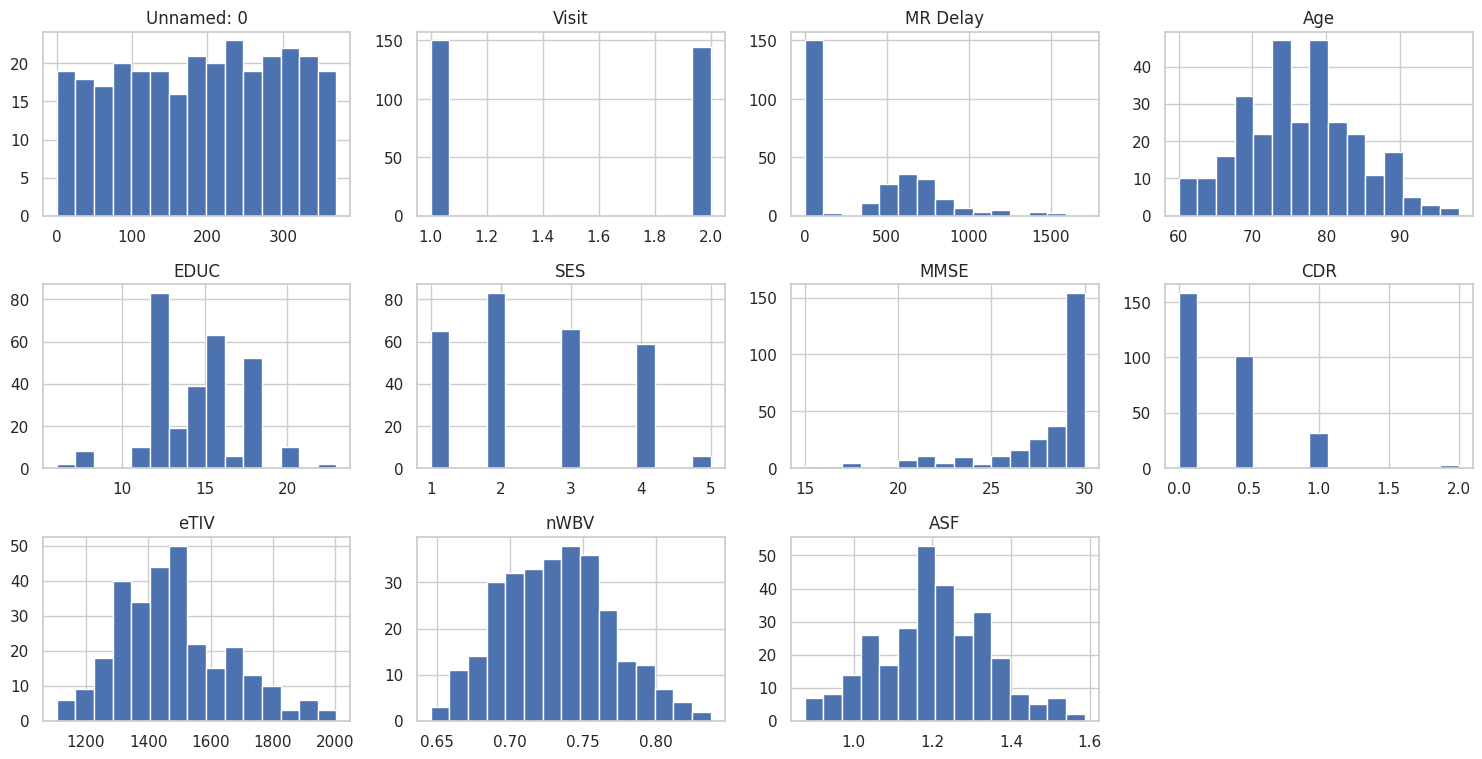

In [6]:
# Histograms for numerical variables
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

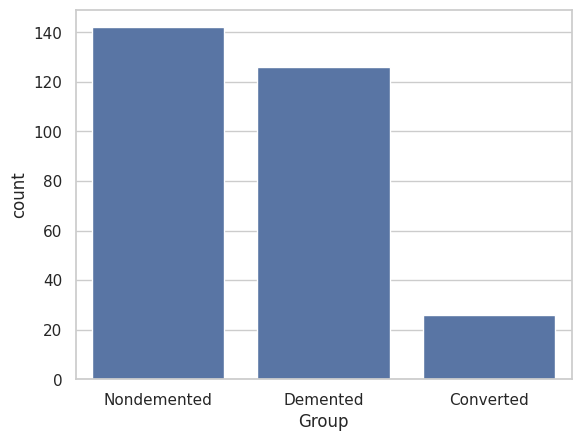

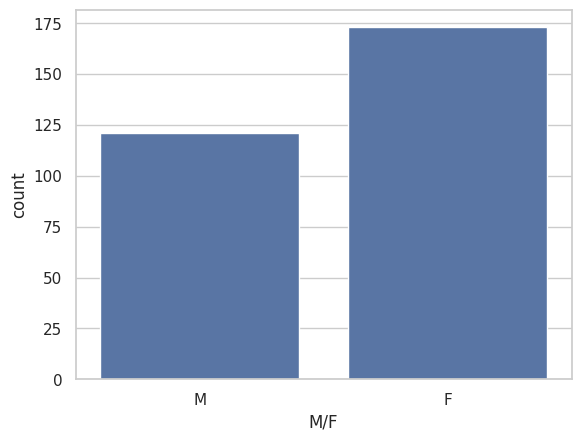

In [7]:
# Count plot for a categorical variable
sns.countplot(x='Group', data=data)
plt.show()

sns.countplot(x='M/F', data=data)
plt.show()

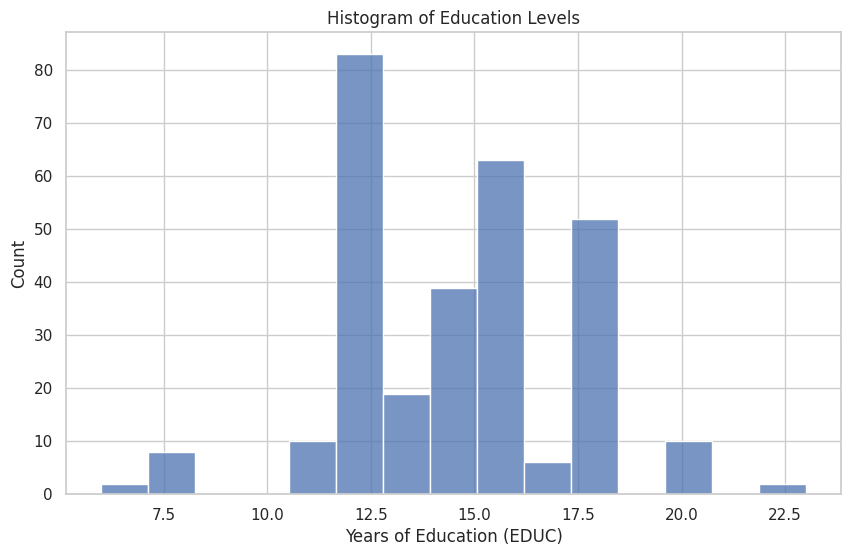

In [8]:
# Generate the histogram for the 'EDUC' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['EDUC'], kde=False, bins=15)  # Adjust bins as needed

plt.title('Histogram of Education Levels')
plt.xlabel('Years of Education (EDUC)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

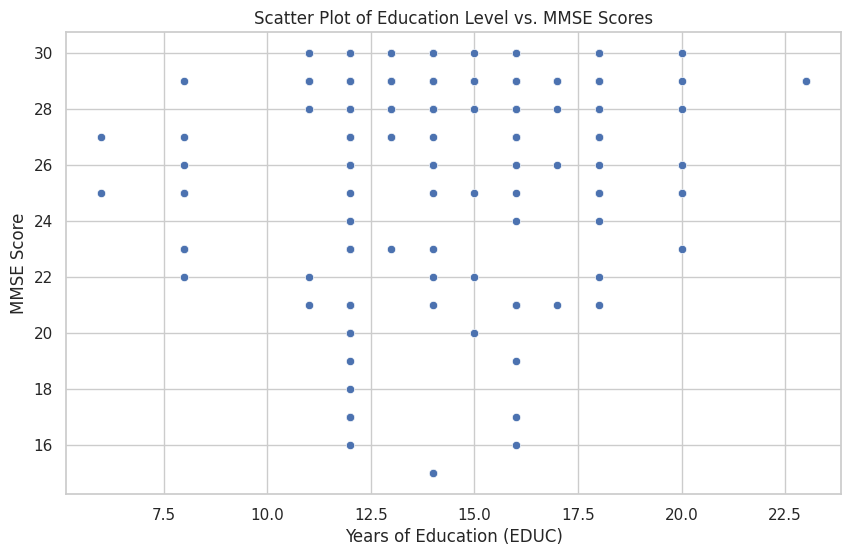

In [9]:
# Create a scatter plot for EDUC vs. MMSE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EDUC', y='MMSE', data=data)

plt.title('Scatter Plot of Education Level vs. MMSE Scores')
plt.xlabel('Years of Education (EDUC)')
plt.ylabel('MMSE Score')
plt.grid(True)
plt.show()

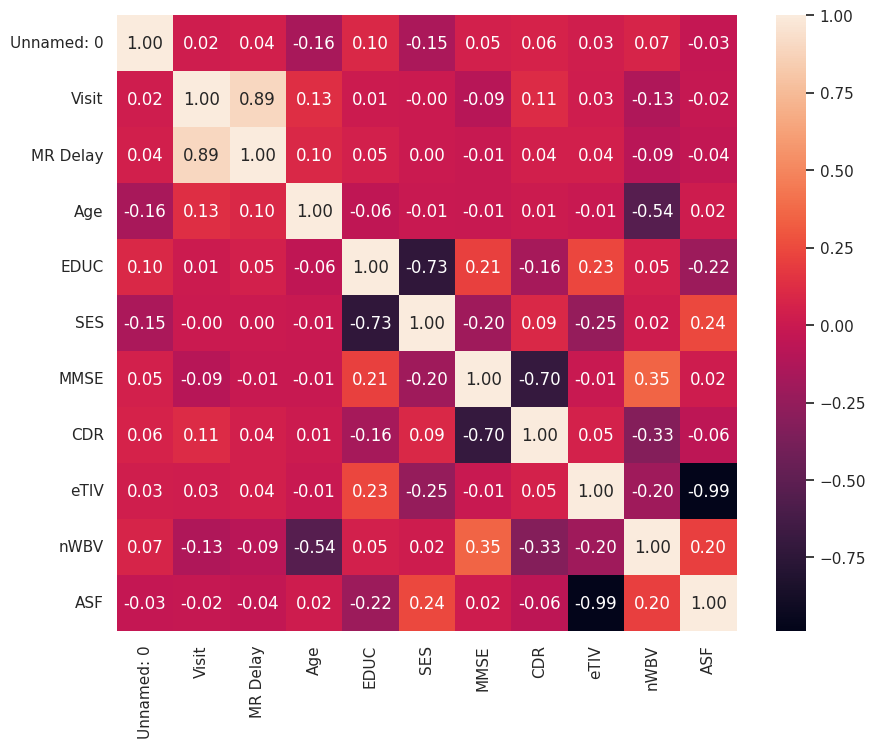

In [10]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

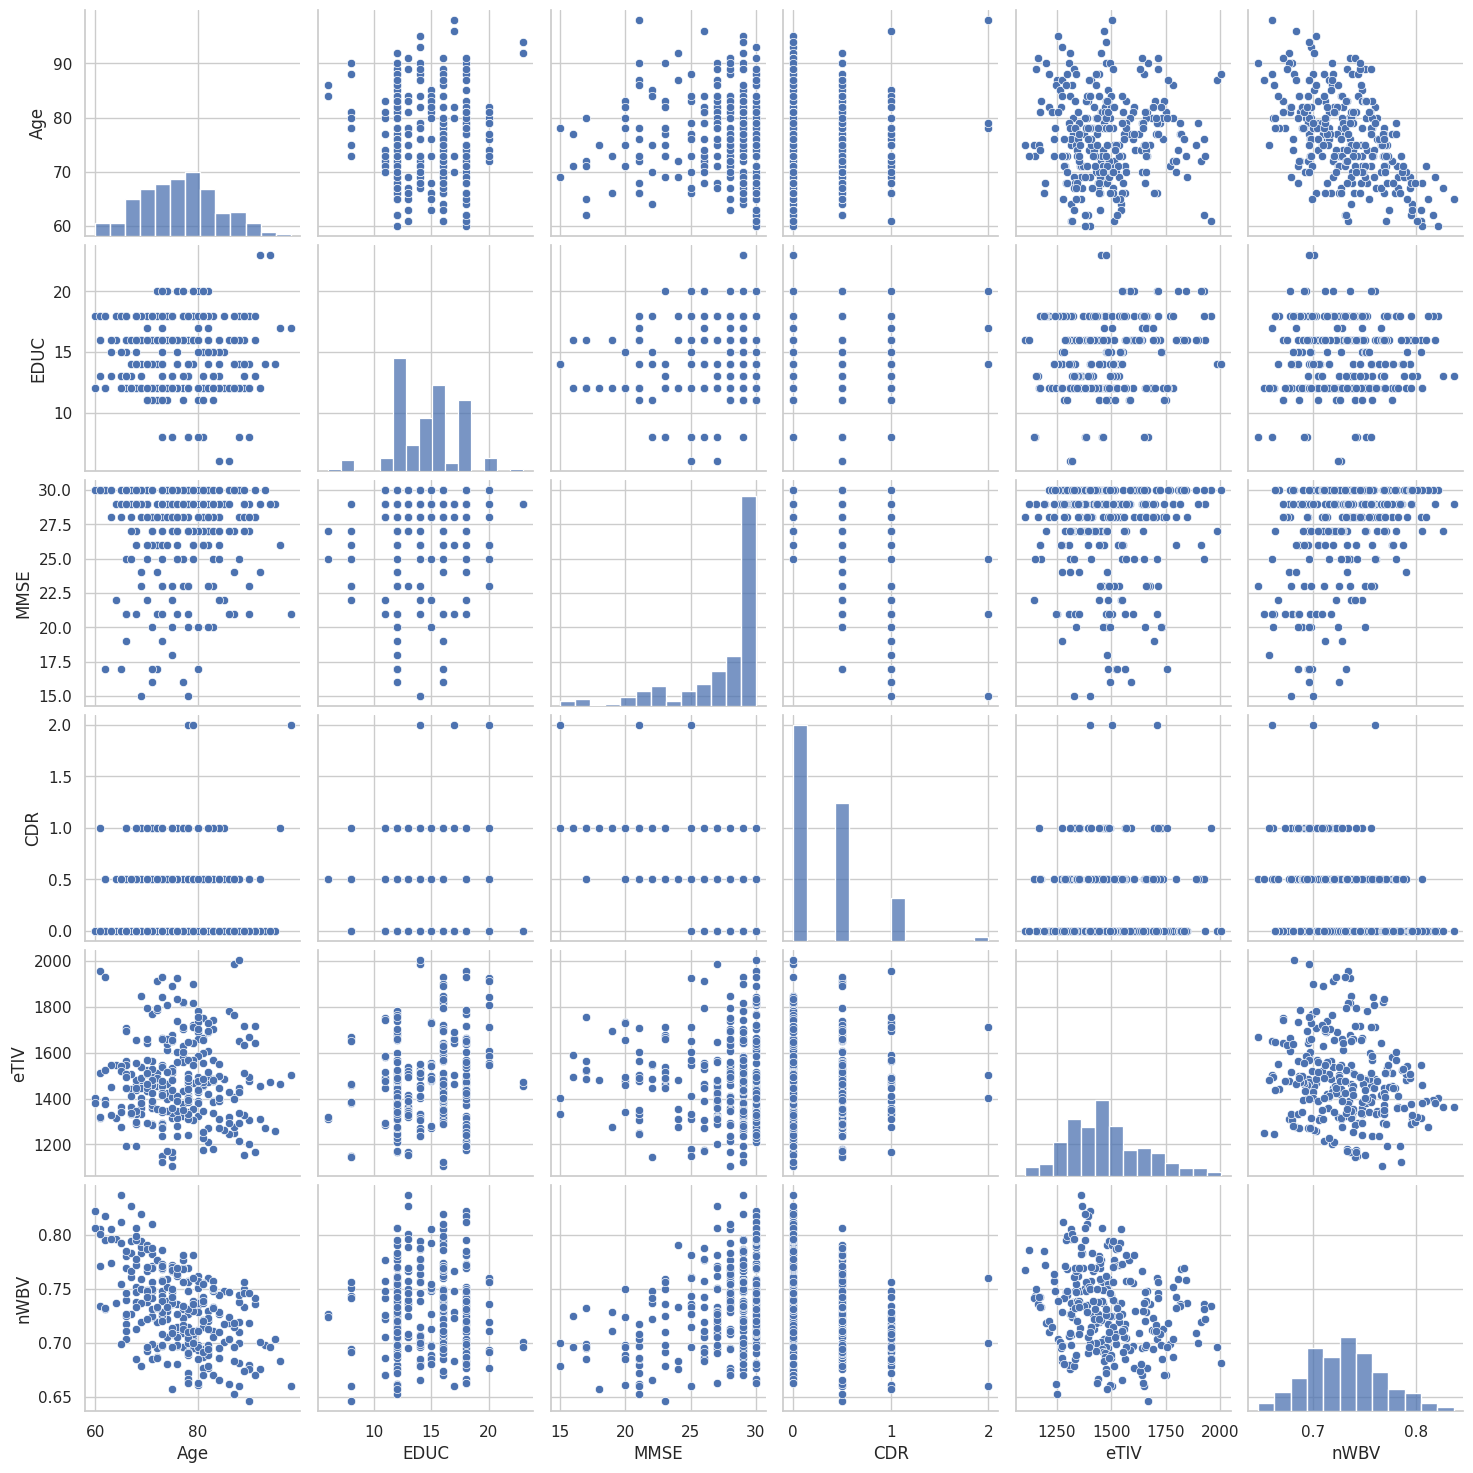

In [11]:
# Pair plot for selected variables
sns.pairplot(data[['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV']])
plt.show()

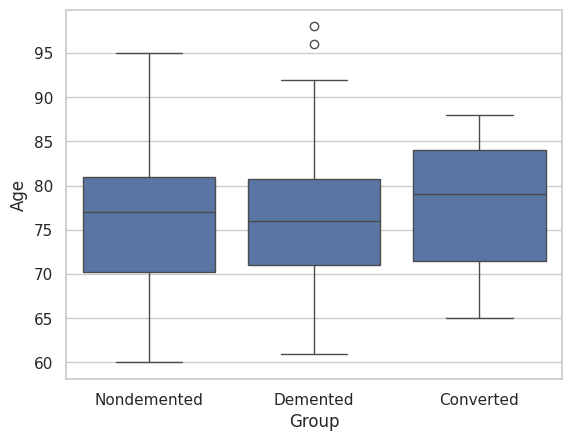

In [12]:
# Box plot for exploring distributions across groups
sns.boxplot(x='Group', y='Age', data=data)
plt.show()

**2 mixed-effects ANOVA models**

In [13]:
!pip install statsmodels

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

In [15]:
# Drop rows with missing 'MMSE' values
data_clean = data.dropna(subset=['MMSE'])

# Ensure 'Group' and 'Visit' are treated as categorical variables
data_clean['Group'] = data_clean['Group'].astype('category')
data_clean['Visit'] = data_clean['Visit'].astype('category')

# run the mixedlm model
md = mixedlm("MMSE ~ Group + Visit", data_clean, groups=data_clean["Subject ID"])
mdf = md.fit()
mdf.summary()

<ipython-input-15-570d72bc0efc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Group'] = data_clean['Group'].astype('category')
<ipython-input-15-570d72bc0efc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Visit'] = data_clean['Visit'].astype('category')


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   MMSE     
No. Observations:     293       Method:               REML     
No. Groups:           150       Scale:                2.5994   
Min. group size:      1         Log-Likelihood:       -664.9841
Max. group size:      2         Converged:            Yes      
Mean group size:      2.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            29.023    0.657 44.148 0.000 27.734 30.311
Group[T.Demented]    -3.900    0.719 -5.426 0.000 -5.309 -2.491
Group[T.Nondemented]  0.420    0.711  0.590 0.555 -0.975  1.814
Visit[T.2]           -0.582    0.190 -3.063 0.002 -0.954 -0.210
Group Var             4.497    0.599                           
===============================================================

"""

In [16]:
# Define the second model including Age or EDUC as fixed effects
md2 = mixedlm("MMSE ~ Group + Visit + Age + EDUC", data_clean, groups=data_clean["Subject ID"])
mdf2 = md2.fit()
print(mdf2.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   MMSE     
No. Observations:     293       Method:               REML     
No. Groups:           150       Scale:                2.6005   
Min. group size:      1         Log-Likelihood:       -668.9661
Max. group size:      2         Converged:            Yes      
Mean group size:      2.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            28.560    2.465 11.585 0.000 23.728 33.392
Group[T.Demented]    -3.817    0.732 -5.213 0.000 -5.252 -2.382
Group[T.Nondemented]  0.409    0.715  0.572 0.568 -0.993  1.811
Visit[T.2]           -0.570    0.197 -2.891 0.004 -0.956 -0.184
Age                  -0.007    0.026 -0.254 0.799 -0.058  0.045
EDUC                  0.065    0.072  0.901 0.367 -0.

**Create Output Plots for Both Models**

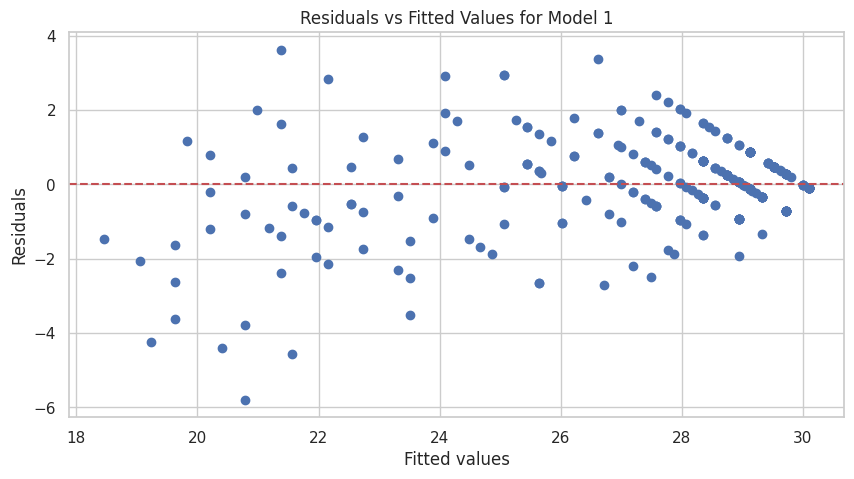

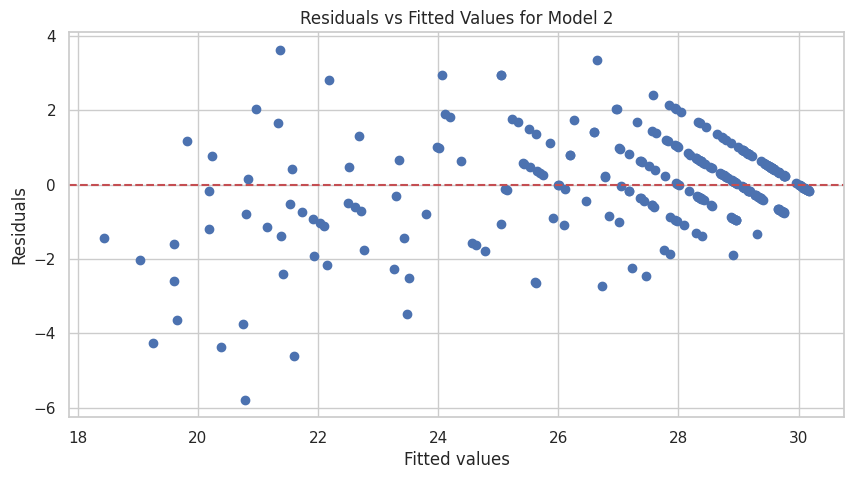

In [17]:
# Plot the residuals of the first model
res1 = mdf.resid
plt.figure(figsize=(10, 5))
plt.scatter(mdf.fittedvalues, res1)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Model 1')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Plot the residuals of the second model
res2 = mdf2.resid
plt.figure(figsize=(10, 5))
plt.scatter(mdf2.fittedvalues, res2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Model 2')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Test Assumptions**

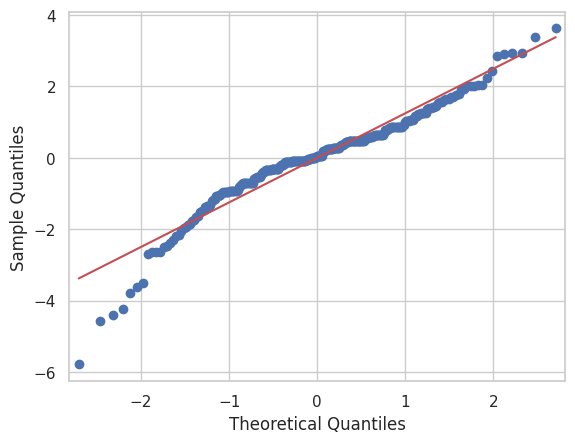

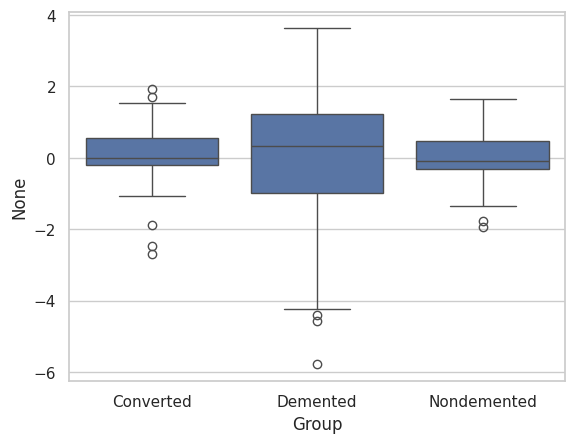

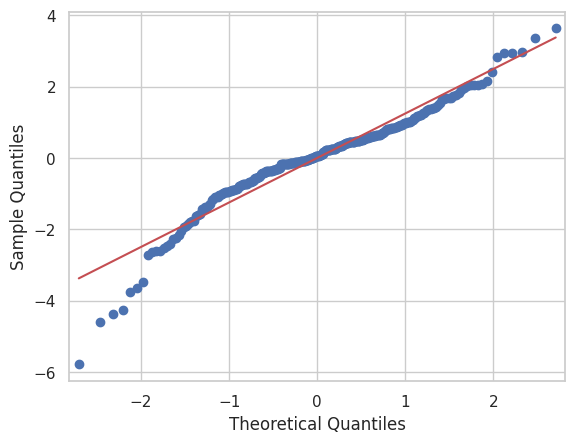

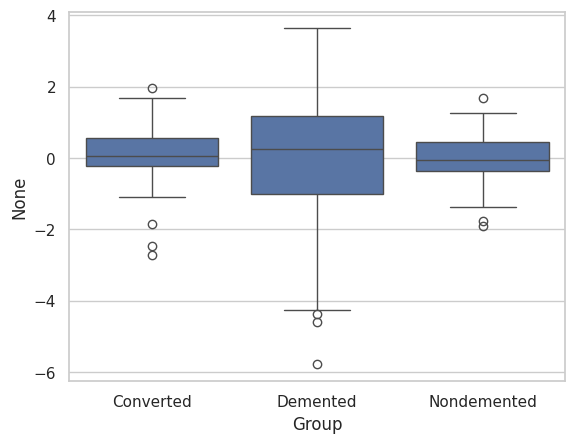

In [18]:
# Normality check for the first model
sm.qqplot(res1, line='s')
plt.show()

# Homogeneity of variance check for the first model
sns.boxplot(x='Group', y=res1, data=data_clean)
plt.show()

# Repeat the normality check and homogeneity of variance check for the second model
sm.qqplot(res2, line='s')
plt.show()

sns.boxplot(x='Group', y=res2, data=data_clean)
plt.show()


**Statistical Power Analysis**

Sample Size: 45.45073088568012


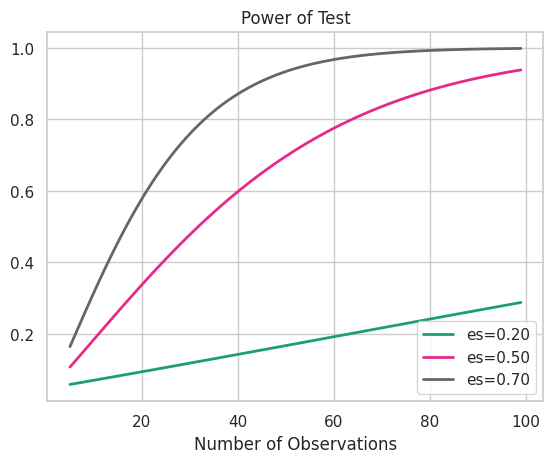

In [19]:
from statsmodels.stats.power import TTestIndPower

# Parameters for the power analysis
effect_size = 0.7  # Given in the instructions
alpha = 0.05       # Given in the instructions
power = 0.91       # Given in the instructions

analysis = TTestIndPower()
result = analysis.solve_power(effect_size, power=power, nobs1=None, alpha=alpha)
print(f"Sample Size: {result}")

# Plotting the power analysis result
analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([0.2, 0.5, 0.7]))
plt.show()